In [1]:
import hdmpy
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

# Simulation Design 1


In [2]:
# Set seed
np.random.seed(123)
B = 50
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [3]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [4]:
print(Orthogonal)
print(Naive)

[4.77  5.291 5.875 5.199 4.522 5.268 5.46  5.095 4.598 5.03  5.631 5.151
 5.167 4.891 5.44  5.371 5.038 5.558 4.778 5.303 5.479 4.635 6.208 4.857
 5.525 5.228 5.186 5.323 4.458 4.859 5.28  4.943 5.519 5.435 5.407 5.052
 4.729 5.267 5.903 5.18  5.443 5.186 4.219 5.272 5.103 4.789 4.937 5.424
 4.598 4.613]
[5.853 5.824 5.985 6.031 5.822 6.163 5.859 5.94  6.005 5.826 6.017 6.03
 5.932 5.76  5.944 6.069 6.005 5.871 6.018 5.981 5.984 5.853 5.969 5.945
 6.046 5.997 6.021 5.796 5.947 5.971 6.09  5.292 5.898 5.95  5.897 5.966
 6.045 6.106 6.035 6.017 5.865 5.956 4.532 5.958 5.911 5.781 6.065 6.065
 5.905 5.893]


Text(0.5, 0, 'Naive - True')

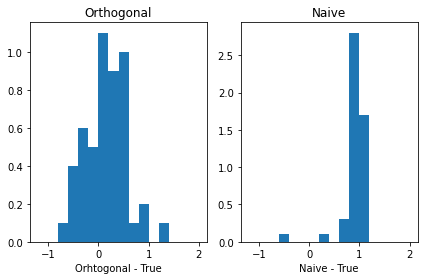

In [5]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orthogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

# Simulation Design 2

In [6]:
# Set seed
np.random.seed(123)
B = 100
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [7]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

Text(0.5, 0, 'Naive - True')

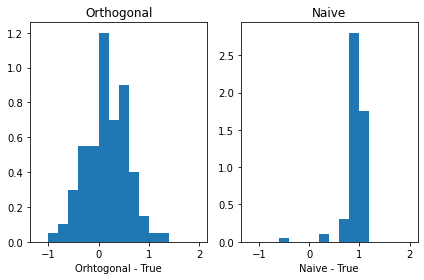

In [8]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orthogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

# Simulation Design 3

In [9]:
# Set seed
np.random.seed(123)
B = 1000
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [10]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

Text(0.5, 0, 'Naive - True')

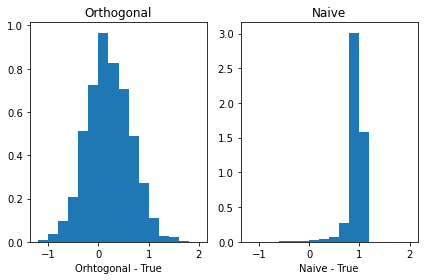

In [11]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orthogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

#Question 1

It is observed that the largest distribution of estimated betas for the Orthogonal case (double-lasso method) are close to the true value of 0 and as the number of trials increases the distribution tends to a normal distribution. On the contrary, for the Naive method, despite the fact that, as the trials are increased, most of the estimated betas have a value close to 1, which shows that the estimator is biased. 

In this case the coefficient of D is 5, therefore, the estimated values of the coefficient of D for both methods should be centered on this value (to construct the graph we subtract 5, to have it centered on 0).


#Question 2

\begin{equation}\label{decompose}
Y =  \alpha D+\gamma'W+\epsilon
\end{equation}

$$
D= \partial_n \alpha(\gamma'_{DW},\gamma'_{YW})=0
$$

$$
M(a,\eta)= E [(\tilde Y(\gamma'_{DW}) -a \tilde D(\gamma'_{YW}))\tilde D(\gamma'_{YW})] = 0    
$$


Where Neyman Orthogonality tells us that alpha is not sensitive to changes in the previously estimated parameters and this is achieved by performing the two Lasso stages where we first remove everything related to w in Y and in the second stage everything related to w in D. Since in the Naive method the second Lasso stage is omitted our estimator D will be related to W so the M equation is not satisfied. 

The selection of the Naive method would not entail problems if we are sure that D is totally random. However, in the problem it is stated that D depends on X so it is necessary to apply the double Lasso method.
